In [113]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [114]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00562/Shill%20Bidding%20Dataset.csv')
df = df.replace(' ?', np.nan)
df.dropna(inplace=True)
df.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [115]:
df.shape

(6321, 13)

In [116]:
df.drop(df.columns[[2]],axis=1,inplace=True)
df.head()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [117]:
df.shape

(6321, 12)

In [118]:
print(df.Class.value_counts())

0    5646
1     675
Name: Class, dtype: int64


In [119]:
max_acc = 0
acc_list = []
param_list = []
for i in range(10):
    sample_df = df.sample(frac=0.40, replace=False)
    x_train, x_test, y_train, y_test = train_test_split(sample_df.drop('Class', axis=1), sample_df.Class, test_size=0.3, random_state=42, stratify=sample_df.Class)
    x_train = StandardScaler().fit_transform(x_train)
    param_grid = { 
                'C':[0.1, 0.5, 1, 2, 3],
                'kernel':['rbf', 'poly', 'sigmoid', 'linear'],
                'degree':[1, 2, 3, 4],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
                }
    
    grid = GridSearchCV(SVC(max_iter=1000), param_grid)
    grid.fit(x_train, y_train)  
    y_pred = grid.predict(x_test)
    print(grid.best_params_)
    print('Sample {}'.format(i+1))
    print('Accuracy: {}\n'.format(accuracy_score(y_test, y_pred))) 
    
    acc_list.append(accuracy_score(y_test, y_pred))
    param_list.append(grid.best_params_)
    
    if accuracy_score(y_test, y_pred) > max_acc:
        max_acc = accuracy_score(y_test, y_pred)
        best_params = grid.best_params_
        best_model = grid.best_estimator_
        best_sample_df = sample_df

{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 1
Accuracy: 0.8959156785243741

{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 2
Accuracy: 0.8893280632411067

{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 3
Accuracy: 0.8985507246376812

{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 4
Accuracy: 0.8945981554677207

{'C': 2, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 5
Accuracy: 0.8985507246376812

{'C': 0.5, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 6
Accuracy: 0.8880105401844532

{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
Sample 7
Accuracy: 0.8932806324110671

{'C': 2, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}
Sample 8
Accuracy: 0.8893280632411067

{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 9
Accuracy: 0.9025032938076416

{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 10
Accuracy: 0.8998682476943346



In [120]:
print(acc_list)
print(param_list)

[0.8959156785243741, 0.8893280632411067, 0.8985507246376812, 0.8945981554677207, 0.8985507246376812, 0.8880105401844532, 0.8932806324110671, 0.8893280632411067, 0.9025032938076416, 0.8998682476943346]
[{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 2, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 0.5, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}, {'C': 2, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}, {'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}]


In [121]:
final_df = pd.DataFrame(data=[acc_list, param_list], index=['Accuracy', 'Parameters']).T
final_df

,Accuracy,Parameters
0,0.895916,"{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': ..."
1,0.889328,"{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': ..."
2,0.898551,"{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': ..."
3,0.894598,"{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': ..."
4,0.898551,"{'C': 2, 'degree': 1, 'gamma': 0.1, 'kernel': ..."
5,0.888011,"{'C': 0.5, 'degree': 1, 'gamma': 0.1, 'kernel'..."
6,0.893281,"{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': ..."
7,0.889328,"{'C': 2, 'degree': 1, 'gamma': 0.1, 'kernel': ..."
8,0.902503,"{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': ..."
9,0.899868,"{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': ..."


In [122]:
print(max_acc)
print(best_params)
print(best_model)
best_sample_df.head()

0.9025032938076416
{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=3, degree=1, gamma=0.1, max_iter=1000)


,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
1646,3933,71,0.027027,0.018519,0.0,0.839071,0.666667,0.999935,0.839071,0.000000,7,0
6201,14851,2157,0.030303,0.025641,0.0,0.998132,0.538462,0.993593,0.998132,0.000000,7,0
3960,9427,1721,0.161290,0.500000,0.0,0.925296,0.000000,0.000000,0.064221,0.857143,7,0
5897,14110,1379,0.055556,0.052632,0.0,0.000632,0.052632,0.000000,0.000632,0.000000,7,0
6283,15045,1395,0.008264,0.031250,0.0,0.645069,0.437500,0.993593,0.645069,0.000000,1,0


In [123]:
iterations = list()
acc_list = list()
x_train, x_test, y_train, y_test = train_test_split(best_sample_df.drop('Class', axis=1), best_sample_df.Class, test_size=0.3, random_state=42, stratify=best_sample_df.Class)
x_train = StandardScaler().fit_transform(x_train)

for i in range(1000):
    x = i+1
    svm = SVC(C=2, degree=1, gamma=0.1, kernel='rbf', max_iter=x)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)
    iterations.append(x)

In [124]:
iterations = np.array(iterations)
acc_list = np.array(acc_list)

In [125]:
print(iterations.shape)
print(acc_list.shape)

(1000,)
(1000,)


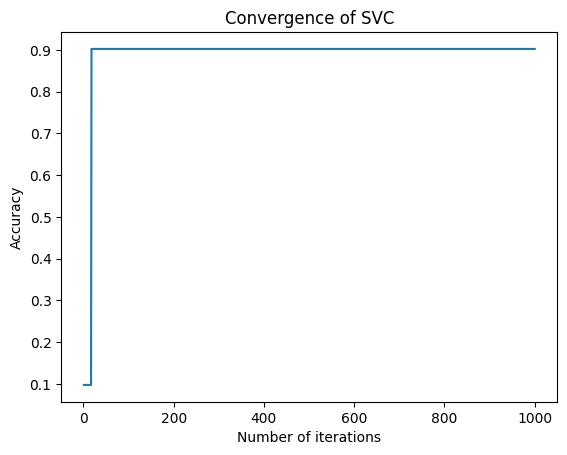

In [126]:
plt.plot(iterations, acc_list)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Convergence of SVC')
plt.show()